In [1]:
%matplotlib inline
%time from hikyuu.interactive import *

from pylab import plot

2024-04-02 16:51:52,026 [INFO] hikyuu version: 1.3.5_202404021336_RELEASE_windows_x64 [<module>] (D:\workspace\hikyuu\hikyuu\__init__.py:91) [hikyuu::hku_info]


2024-04-02 16:51:52.422 [HKU-I] - Using MYSQL BaseInfoDriver (BaseInfoDriver.cpp:58)
2024-04-02 16:51:52.448 [HKU-I] - Loading market information... (StockManager.cpp:532)
2024-04-02 16:51:52.460 [HKU-I] - Loading stock type information... (StockManager.cpp:545)
2024-04-02 16:51:52.472 [HKU-I] - Loading stock information... (StockManager.cpp:460)
2024-04-02 16:51:52.631 [HKU-I] - Loading stock weight... (StockManager.cpp:562)
2024-04-02 16:51:53.811 [HKU-I] - Loading KData... (StockManager.cpp:133)
2024-04-02 16:51:54.466 [HKU-I] - Preloading all day kdata to buffer! (StockManager.cpp:171)
2024-04-02 16:51:54.467 [HKU-I] - Preloading all week kdata to buffer! (StockManager.cpp:174)
2024-04-02 16:51:54.467 [HKU-I] - Preloading all month kdata to buffer! (StockManager.cpp:177)
2024-04-02 16:51:54.472 [HKU-I] - 0.66s Loaded Data. (StockManager.cpp:150)
CPU times: total: 484 ms
Wall time: 3.27 s


# 示例：通道突破系统

当价格突破20日高点时买入，当价格低于10日低点时卖出。

In [2]:
#创建一个从2001年1月1日开始的账户，初始资金20万元
my_tm = crtTM(Datetime(200101010000), 200000)

In [3]:
my_sys = SYS_Simple(tm=my_tm)

In [4]:
def TurtleSG(self, k):
     n1 = self.get_param("n1")
     n2 = self.get_param("n2")
     c = CLOSE(k)
     h = REF(HHV(c, n1), 1) #前n日高点
     L = REF(LLV(c, n2), 1) #前n日低点
     for i in range(h.discard, len(k)):
         if (c[i] >= h[i]):
             self._add_buy_signal(k[i].datetime)
         elif (c[i] <= L[i]):
             self._add_sell_signal(k[i].datetime)

In [5]:
my_sg = crtSG(TurtleSG, {'n1': 20, 'n2': 10}, 'TurtleSG')

my_mm = MM_Nothing()

s = sm['sz000001']
query = Query(Datetime(200101010000), Datetime(201705010000))

my_sys.mm = my_mm
my_sys.sg = my_sg
my_sys.run(s, query)

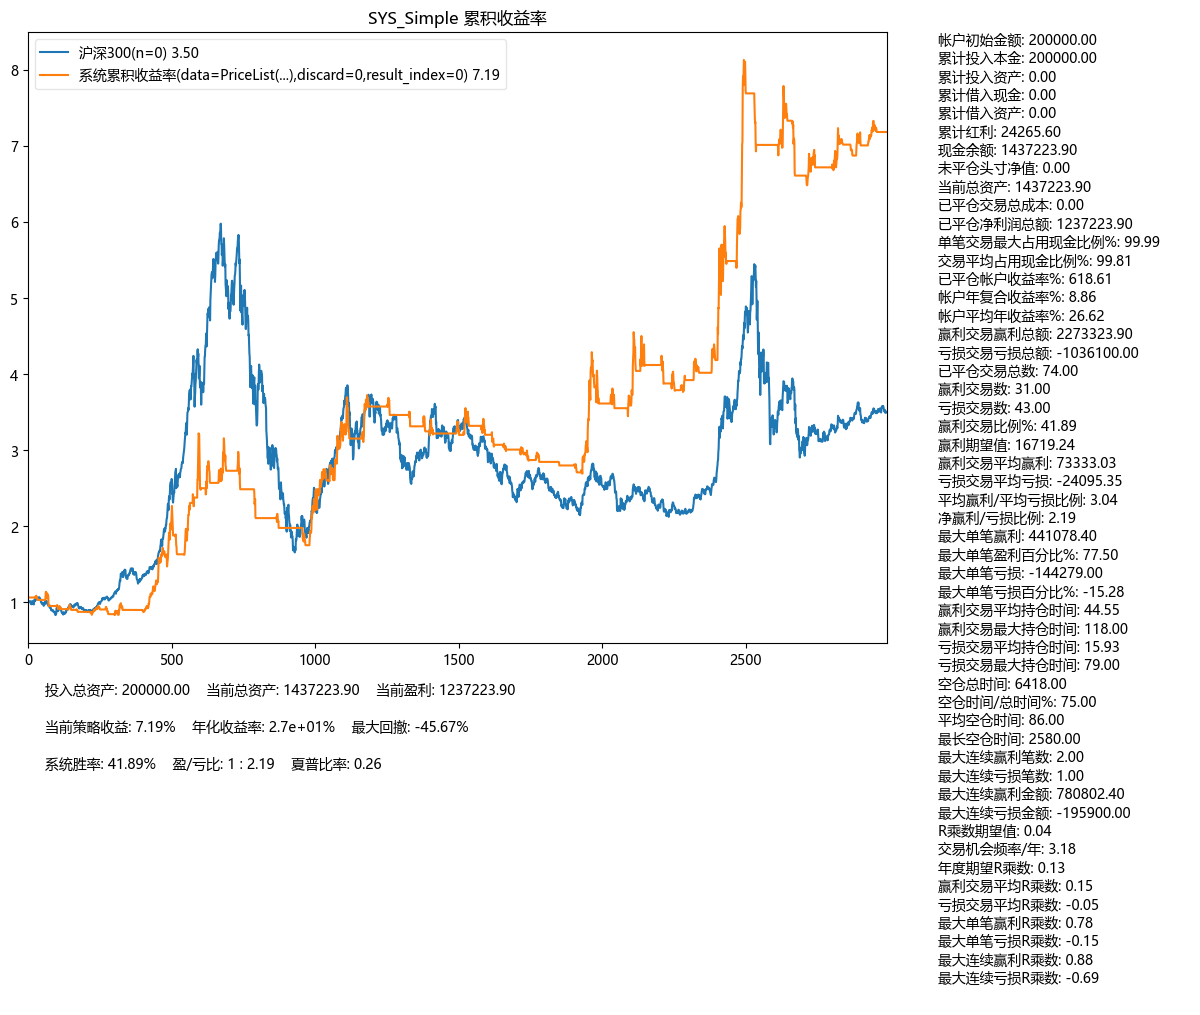

In [6]:
my_sys.performance()

In [7]:
per = Performance()
print(per.report(my_sys.tm, Datetime(datetime.today())))

帐户初始金额: 200000.00
累计投入本金: 200000.00
累计投入资产: 0.00
累计借入现金: 0.00
累计借入资产: 0.00
累计红利: 24265.60
现金余额: 1437223.90
未平仓头寸净值: 0.00
当前总资产: 1437223.90
已平仓交易总成本: 0.00
已平仓净利润总额: 1237223.90
单笔交易最大占用现金比例%: 99.99
交易平均占用现金比例%: 99.81
已平仓帐户收益率%: 618.61
帐户年复合收益率%: 8.86
帐户平均年收益率%: 26.62
赢利交易赢利总额: 2273323.90
亏损交易亏损总额: -1036100.00
已平仓交易总数: 74.00
赢利交易数: 31.00
亏损交易数: 43.00
赢利交易比例%: 41.89
赢利期望值: 16719.24
赢利交易平均赢利: 73333.03
亏损交易平均亏损: -24095.35
平均赢利/平均亏损比例: 3.04
净赢利/亏损比例: 2.19
最大单笔赢利: 441078.40
最大单笔盈利百分比%: 77.50
最大单笔亏损: -144279.00
最大单笔亏损百分比%: -15.28
赢利交易平均持仓时间: 44.55
赢利交易最大持仓时间: 118.00
亏损交易平均持仓时间: 15.93
亏损交易最大持仓时间: 79.00
空仓总时间: 6418.00
空仓时间/总时间%: 75.00
平均空仓时间: 86.00
最长空仓时间: 2580.00
最大连续赢利笔数: 2.00
最大连续亏损笔数: 1.00
最大连续赢利金额: 780802.40
最大连续亏损金额: -195900.00
R乘数期望值: 0.04
交易机会频率/年: 3.18
年度期望R乘数: 0.13
赢利交易平均R乘数: 0.15
亏损交易平均R乘数: -0.05
最大单笔赢利R乘数: 0.78
最大单笔亏损R乘数: -0.15
最大连续赢利R乘数: 0.88
最大连续亏损R乘数: -0.69



In [8]:
calendar = sm.get_trading_calendar(query, 'SZ')
# calendar

In [9]:
x1 = my_tm.get_funds_curve(calendar, Query.DAY)

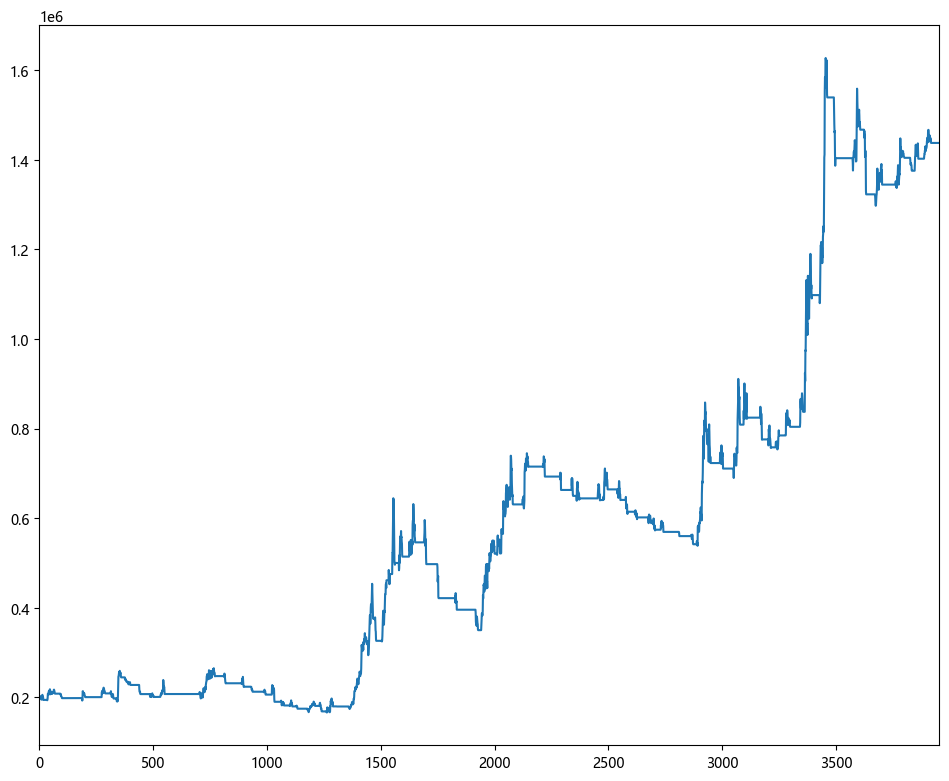

In [10]:
PRICELIST(x1).plot()

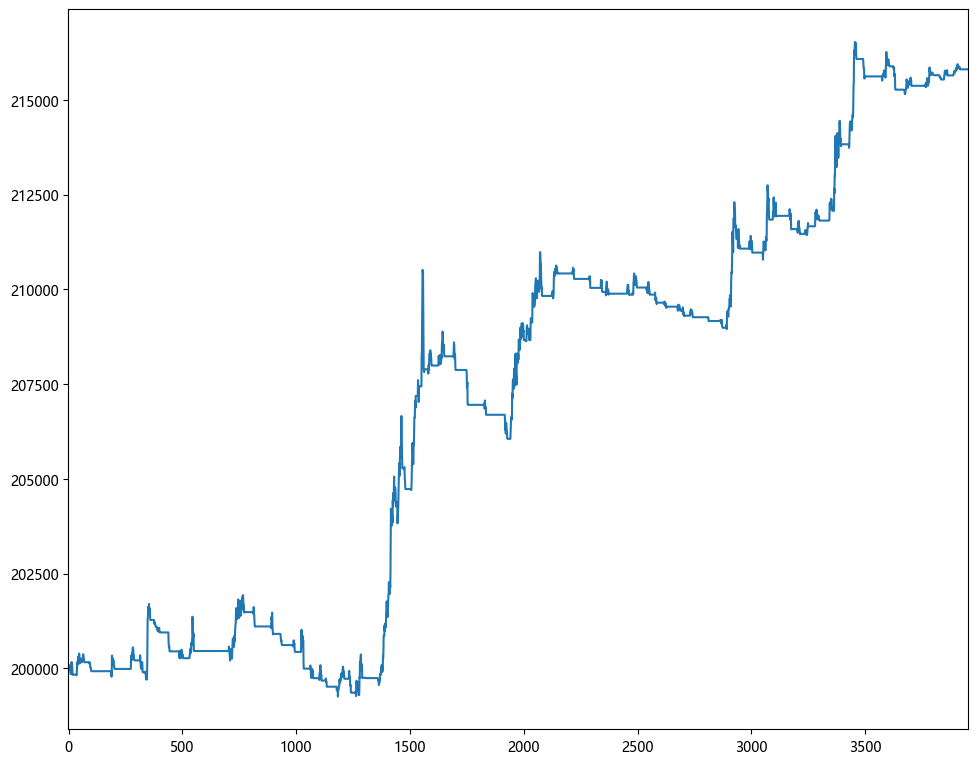

In [11]:
my_sys.mm = MM_FixedPercent(0.03)
my_sys.run(s, query)

x2 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x2).plot()

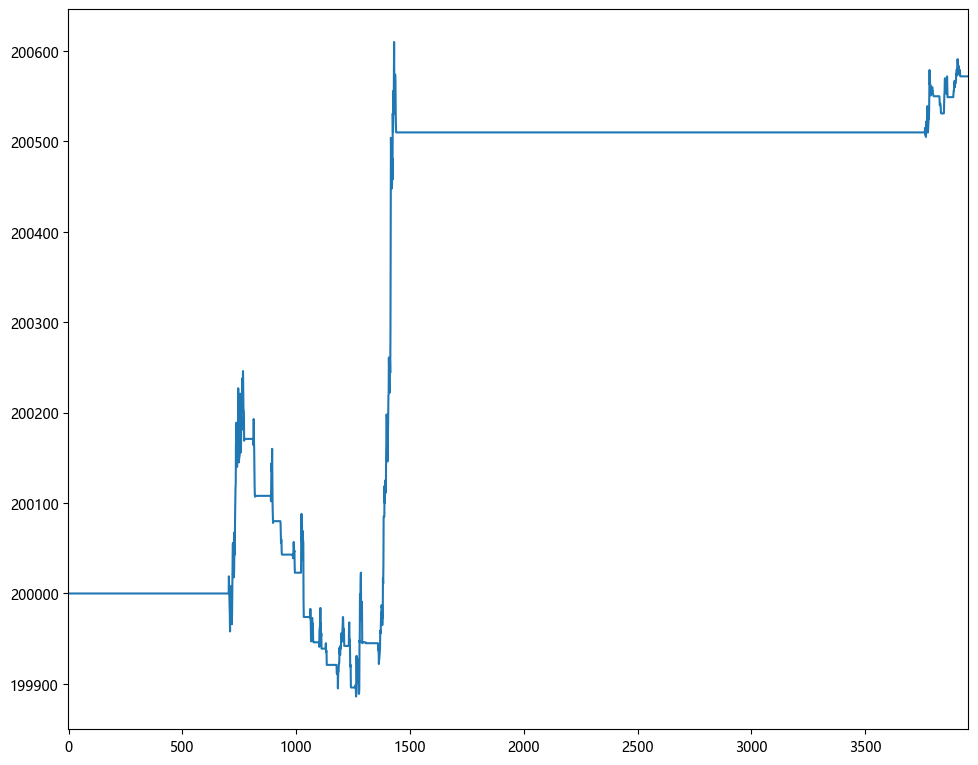

In [12]:
my_sys.mm = MM_FixedRisk(1000)
my_sys.run(s, query)

x3 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x3).plot()

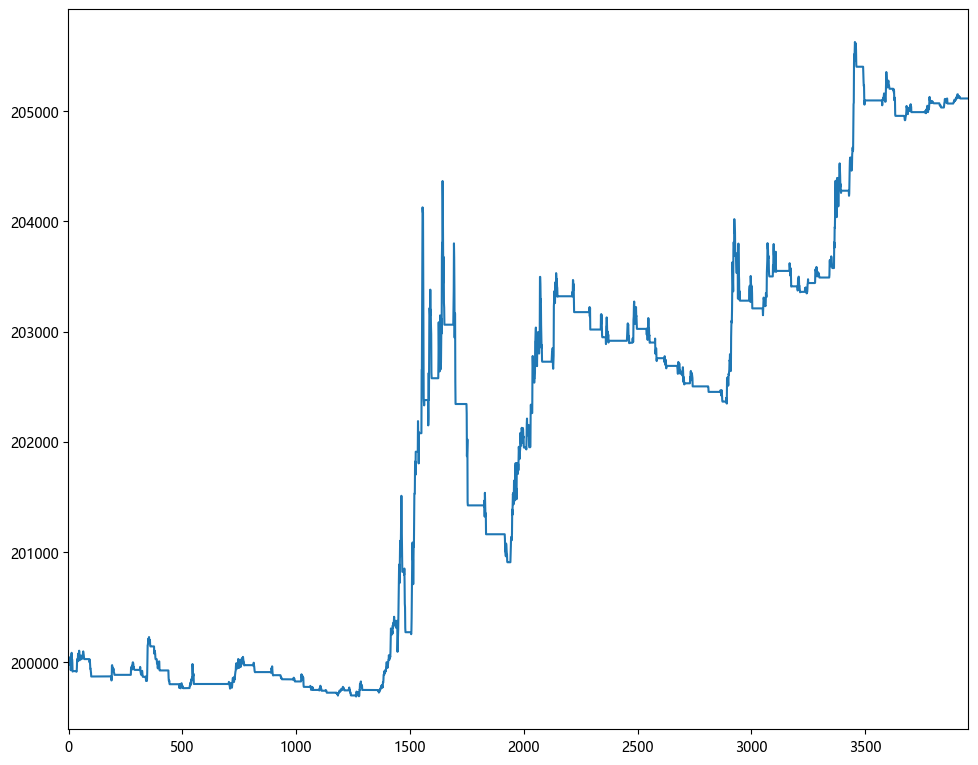

In [13]:
my_sys.mm = MM_FixedCapital(1000)
my_sys.run(s, query)

x4 = my_tm.get_funds_curve(calendar, Query.DAY)
PRICELIST(x4).plot()

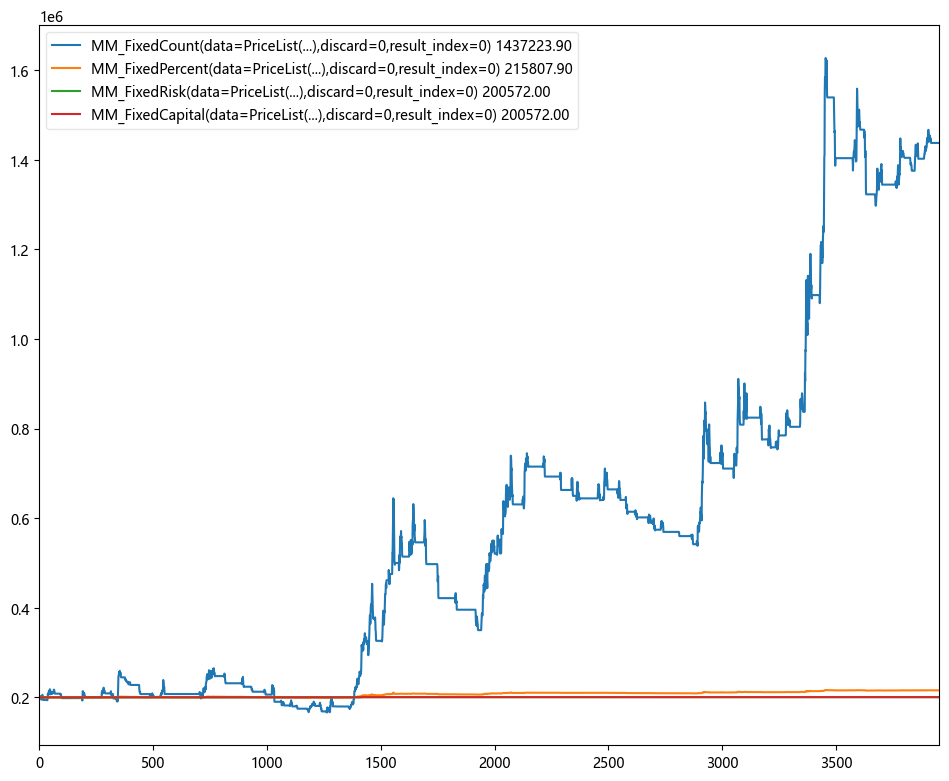

In [14]:
ax = create_figure(1)

def x_plot(x, name, ax):
    px = PRICELIST(x)
    px.name = name
    px.plot(axes=ax, legend_on=True)

x_plot(x1, 'MM_FixedCount', ax)
x_plot(x2, 'MM_FixedPercent', ax)
x_plot(x3, 'MM_FixedRisk', ax)
x_plot(x3, 'MM_FixedCapital', ax)